In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")


# Read Data

In [2]:
FILE_MIN = 'data/llps_minus.csv'
FILE_PLUS = 'data/llps_plus.csv'
FILE_PDB = 'data/pdb30.csv'

df_minus = pd.read_csv(FILE_MIN, index_col=0)
df_plus = pd.read_csv(FILE_PLUS)
df_pdb= pd.read_csv(FILE_PDB)

print(f'MIN entries: {len(df_minus)}')
print(f'PLUS entries: {len(df_plus)}')
print(f'PDB entries: {len(df_pdb)}')

MIN entries: 84
PLUS entries: 137
PDB entries: 1562


# Plot Pie

1783
Labels: ('LLPS+', 'PDB', 'LLPS-')
Sizes: [137, 1562, 84]
Percentage: [0.07683679192372406, 0.876051598429613, 0.04711160964666293]


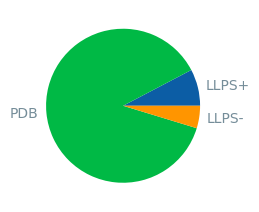

In [3]:
labels = 'LLPS+', 'PDB', 'LLPS-'
sizes = [len(df_plus), len(df_pdb), len(df_minus)]
total = sum(sizes)
print(total)
print(f'Labels: {labels}')
print(f'Sizes: {sizes}')
print(f'Percentage: {[s/total for s in sizes]}')

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

fig.savefig('proteins_histogram.pdf')

# Lenght of Sequence

Checking the lenght of the sequences in the different subgroups

In [4]:
df_minus['lenght'] = [len(seq) for seq in df_minus['Sequence']]
df_plus['lenght'] = [len(seq) for seq in df_plus['Sequence']]
df_pdb['lenght'] = [len(seq) for seq in df_pdb['seq']]

Text(0.5, 0, 'Lenght')

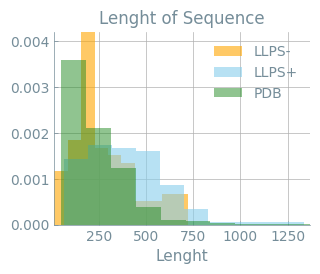

In [5]:
fig, ax = plt.subplots(1,1)
df_minus.hist('lenght', ax= ax, alpha = 0.6, density = 1, color = 'orange', label = 'LLPS-')
df_plus.hist('lenght',ax = ax, alpha = 0.6, density = 1, color = 'skyblue', label = 'LLPS+')
df_pdb.hist('lenght',ax = ax, alpha = 0.5, density = 1, color = 'forestgreen', label = 'PDB')

ax.legend()
ax.set_title('Lenght of Sequence')
ax.set_xlabel('Lenght')

# Creates Bins

In [6]:
df_minus['min_plus'] = 0
df_plus['min_plus'] = 1

df_minus['min_pdb'] = 0
df_pdb['min_pdb'] = 1

df_pdb['pdb_plus'] = 0
df_plus['pdb_plus'] = 1

In [7]:
df_combined = pd.concat([df_minus, df_plus, df_pdb])
print(df_combined['min_plus'].value_counts(dropna=False))

min_plus
NaN    1562
1.0     137
0.0      84
Name: count, dtype: int64


# Update csv file

In [8]:
import random

In [9]:
df_all = pd.read_csv('LLPS_all.csv')
df_all['lenght'] = [len(seq) for seq in df_all['Sequence']]
df_all['first_20'] = [seq[0:20] for seq in df_all['Sequence']]
df_all['lenght'] = [len(seq) for seq in df_all['Sequence']]

df_all['shuffle_seq'] = df_all['Sequence'].apply(lambda seq: ''.join(random.sample(seq, len(seq))))


In [15]:
cols = [col for col in df_all.columns if not col.startswith('Unnamed')]
df_all = df_all[cols]
df_all

,Sequence,Uniprot_ID,min_plus,min_pdb,pdb_plus,lenght,first_20,shuffle_seq
0,GQNTRWNNLDAPPSRGTSKWENRGARDERIEQELFSGQLSGINFDK...,D0PV95,0.0,0.0,NaN,541,GQNTRWNNLDAPPSRGTSKW,GGPSYPEVEKENIIHFNLRDFQVGMSRLRHRGNSRLAALDEPSHEG...
1,NTIFVQGLGENVTIESVADYFKQIGIIKTNKKTGQPMINLYTDRET...,P35637,0.0,0.0,NaN,242,NTIFVQGLGENVTIESVADY,DCMNTDNRGNFGGFPTWNKDGGSGGHQKTFPRKKGRFDAPYRGCGG...
2,MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVM...,P09651-2,0.0,0.0,NaN,320,MSKSESPKEPEQLRKLFIGG,QDDKGASSSGSSERGSFEIGYPFGAREFGGMFPDNHGDPHGARGVT...
3,DRRGGRGGYDRGGYRGRGGDRGGFRGGRGGGDRGGFGPGK,P35637,0.0,0.0,NaN,40,DRRGGRGGYDRGGYRGRGGD,DGRRPGGGRGGGGRRGRRGGYRFDGGDKGGGGFRGDGYRG
4,MASNDYTQQATQSYGAYPTQPGQGYSQQSSQPYGQQSYSGYSQSTD...,P35637,0.0,0.0,NaN,163,MASNDYTQQATQSYGAYPTQ,GSGSTQGGSGSGSQQSQQQQSQQYASYTQDPYQYYQYSQYYSSSQY...
...,...,...,...,...,...,...,...,...
1778,MANFLTKNFVWILAAGVGVWFYQKADNAAKTATKPIADFLAELQFL...,NaN,NaN,1.0,0.0,127,MANFLTKNFVWILAAGVGVW,LPYDDNGTDLVAEKHFLLRDSYARFFAVNSWILGAAVVKIDVGTEA...
1779,MIVKKKLAAGEFAETFKNGNNITIIKAVGELVLRAYGADGGEGLRT...,NaN,NaN,1.0,0.0,335,MIVKKKLAAGEFAETFKNGN,LEYRGDFVAEYKGELVVYGSDEVFFSDVGTKSGEAPRGEDGMGSNS...
1780,MINMTRKLYYEDAYLKEAKGRVLEIRDNAILLDQTIFYPTGGGQPH...,NaN,NaN,1.0,0.0,216,MINMTRKLYYEDAYLKEAKG,YQIKRYMLLNKEFGINMVLVNHKADTRRGNLVGGDKYHVGGAGYLI...
1781,MMTALETRLSVADGTHAAALRQRLQAALAECRRELARGACPEHFQF...,NaN,NaN,1.0,0.0,67,MMTALETRLSVADGTHAAAL,RDRCEITGARHAAALFSQALTVPLTQEDRALEQGRMCHTLEAALSA...


In [16]:
df_all.to_csv('LLPS_all.csv')

# Explore Sequence

In [12]:
from collections import Counter
def analyze_sequence(seq):
    info = {}
    info.update({'lenght': len(seq)})

    info.update({'uniques': sorted(list(set(list(seq))))})
    aa_counter = Counter(list(seq))
    info.update({'most': {aa: c for aa,c in aa_counter.items() if c == max(aa_counter.values())}})

    for k,v in info.items():
        print(f"{k}\t\t{v}")
    
    return info

In [13]:
INDEX = 0

seq = df_all.iloc[INDEX]['Sequence']
analyze_sequence(seq)

lenght		541
uniques		['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
most		{'G': 71}


{'lenght': 541,
 'uniques': ['A',
  'C',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'K',
  'L',
  'M',
  'N',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'V',
  'W',
  'Y'],
 'most': {'G': 71}}